<a href="https://colab.research.google.com/github/TeoFalco/Cactus/blob/main/Copia_di_Clustering_cactus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def find_cluster_centers(data, K, labels):

  '''
  INPUT
  data    - data matrix for which to compute the proximity matrix
  K       - the expected number of clusters
  labels  - predicted labels from the clustering solution applied to data
  '''

  '''
  OUTPUT
  cluster_centers   - cluster centres from the clustering solution applied to data
  '''

  # Initialize the output
  cluster_centers = np.zeros((K, np.shape(data)[1]))   # np.shape(data)[1] = no. of attributes

  print("%d centroids are being computed, as we have %d clusters." % (K, K) )

  for k in range(0, K):
    ind = np.array( np.where( labels == k ) )
    cluster_points = data[ind, :][0]
    cluster_centers[k,:] = np.mean(cluster_points, axis=0) # cluster_points.mean(axis=0)
    print("The centroid of cluster %d has coordinates: " % (k), *cluster_centers[k,:].round(2))

  return cluster_centers

In [ ]:
def PCA_tSNE_visualization(data2visualize, NCOMP, LABELS, PAL):

  '''
  INPUT
  data2visualize    - data matrix to visualize
  NCOMP             - no. of components to decompose the dataset during PCA
  LABELS            - labels given by the clustering solution
  PAL               - palette of colours to distinguish between clusters
  '''

  '''
  OUTPUT
  Two figures: one using PCA and one using tSNE
  '''


  # PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components=NCOMP)
  pca_result = pca.fit_transform(data2visualize)
  print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))

  # tSNE
  from sklearn.manifold import TSNE
  print('\nApplying tSNE...')
  np.random.seed(100)
  tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300)
  tsne_results = tsne.fit_transform(data2visualize)


  # Plots
  fig1000 = plt.figure(figsize=(10,5))
  fig1000.suptitle('Dimensionality reduction of the dataset', fontsize=16)


  # Plot 1: 2D image of the entire dataset
  ax1 = fig1000.add_subplot(121)
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
  ax1.set_xlabel('Dimension 1', fontsize=10)
  ax1.set_ylabel('Dimension 2', fontsize=10)
  ax1.title.set_text('PCA')
  plt.grid()

  ax2= fig1000.add_subplot(122)
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)
  ax2.set_xlabel('Dimension 1', fontsize=10)
  ax2.set_ylabel('Dimension 2', fontsize=10)
  ax2.title.set_text('tSNE')
  plt.grid()
  plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cactus/CACTUS con lo scienziato/Cactus - not an ordinary test (Responses) - Risposte del modulo 1 (5).csv')

In [ ]:
# drop all the samples with too many Nan values
df = df.dropna(thresh=0.99, axis=0)

In [ ]:
# drop useless features
df = df.drop([0, 1], axis=0)
df = df.drop(['Unnamed: 32' , 'Unnamed: 33' , 'Unnamed: 34' , 'Unnamed: 35' , 'Informazioni cronologiche' , 'Indirizzo email' , 'Fingerprint - DO NOT EDIT' , 'Data di Nascita' ,'Punteggio', df.columns[2] , df.columns[3] , df.columns[4] , df.columns[5] , df.columns[36] , df.columns[37] , df.columns[38] , df.columns[39] , df.columns[40] , df.columns[41] , df.columns[42] , df.columns[43] , df.columns[44] , df.columns[46], df.columns[51], df.columns[54]] , axis=1)
df = df.dropna(thresh=0.99, axis=1)

In [ ]:
# Rename columns with shorter titles
df = df.rename(columns={df.columns[0]: 'Casa_come_la_tua',
                        df.columns[1]: 'Punteggiatura_sbagliata',
                        df.columns[2]: 'Sinonimo_lustrare',
                        df.columns[3]: 'Sinonimo_fatuo',
                        df.columns[4]: 'Connettivo_1',
                        df.columns[5]: 'Connettivo_2',
                        df.columns[6]: 'Connettivo_3',
                        df.columns[7]: 'Analogia',
                        df.columns[8]: 'Subordinata',
                        df.columns[9]: 'Fiorire_talenti',
                        df.columns[10]: 'Sequenza_lettere',
                        df.columns[11]: 'Valore_picche',
                        df.columns[12]: 'Aia_ceffo',
                        df.columns[13]: 'Quarantatre_sillabe',
                        df.columns[14]: 'Proporzione',
                        df.columns[15]: 'Trova_intruso',
                        df.columns[16]: 'Serie_numerica_1',
                        df.columns[17]: 'Serie_numerica_2',
                        df.columns[18]: 'Sillogismo_patrizia',
                        df.columns[19]: 'Diagramma_venn_1',
                        df.columns[20]: 'Diagramma_venn_2',
                        df.columns[21]: 'Diagramma_venn_3',
                        df.columns[22]: 'Grafico_torta',
                        df.columns[23]: 'Immagine_sequenza_1',
                        df.columns[24]: 'Immagine_sequenza_2',
                        df.columns[25]: 'Immagine_sequenza_3',
                        df.columns[26]: 'Parola_polisemica_1',
                        df.columns[27]: 'Parola_polisemica_2',
                        df.columns[28]: 'Connettivo'
                        })


In [ ]:
# Convert columns to the best possible dtypes
df = df.convert_dtypes()

In [ ]:
#get integer columns
integer_columns=df.select_dtypes(include=int).columns

In [ ]:
integer_columns

Index(['Valore_picche', 'Aia_ceffo', 'Quarantatre_sillabe', 'Serie_numerica_1',
       'Serie_numerica_2', 'Grafico_torta'],
      dtype='object')

In [ ]:
# get categorical columns
categorical_columns = df.select_dtypes(include='string').columns.tolist()

In [ ]:
df[integer_columns] = df[integer_columns].astype(str)

In [ ]:
# Convert columns to the best possible dtypes
df[integer_columns] = df[integer_columns].convert_dtypes()

In [ ]:
# replace nan values
df = df.fillna('nessuna risposta')

In [ ]:
# final check
df.isnull().values.any()

False

In [ ]:
df.describe()

,Casa_come_la_tua,Punteggiatura_sbagliata,Sinonimo_lustrare,Sinonimo_fatuo,Connettivo_1,Connettivo_2,Connettivo_3,Analogia,Subordinata,Fiorire_talenti,...,Diagramma_venn_1,Diagramma_venn_2,Diagramma_venn_3,Grafico_torta,Immagine_sequenza_1,Immagine_sequenza_2,Immagine_sequenza_3,Parola_polisemica_1,Parola_polisemica_2,Connettivo
count,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
unique,3,4,2,3,12,14,8,4,4,4,...,5,4,5,5,5,4,6,7,10,4
top,Lucia disse a Giovanni che avrebbe voluto una ...,"Non ho capito, se ti piace o no.",Lucidare,Insensato,Quindi,Nonostante,Affinché,magnolie : fioritura = scuola : orientamento,Relativa,"Perché, non conoscendosi a sufficienza, non tr...",...,Opzione 1,Opzione 3,Opzione 2,8,a.,b.,d.,Voce,Quadro,Avversativo
freq,26,33,40,31,9,15,14,18,29,33,...,19,32,19,31,28,37,21,28,29,35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 3 to 44
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Casa_come_la_tua         41 non-null     string
 1   Punteggiatura_sbagliata  41 non-null     string
 2   Sinonimo_lustrare        41 non-null     string
 3   Sinonimo_fatuo           41 non-null     string
 4   Connettivo_1             41 non-null     string
 5   Connettivo_2             41 non-null     string
 6   Connettivo_3             41 non-null     string
 7   Analogia                 41 non-null     string
 8   Subordinata              41 non-null     string
 9   Fiorire_talenti          41 non-null     string
 10  Sequenza_lettere         41 non-null     string
 11  Valore_picche            41 non-null     string
 12  Aia_ceffo                41 non-null     string
 13  Quarantatre_sillabe      41 non-null     string
 14  Proporzione              41 non-null     string
 

In [ ]:
#lower case
df=df.applymap(lambda x: x.lower())
#remove spaces
df=df.applymap(lambda x: x.strip().replace(" ", ""))

<ipython-input-19-53b9e831a19e>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x: x.lower())
<ipython-input-19-53b9e831a19e>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x: x.strip().replace(" ", ""))


## Data Augmentation

In [ ]:
starter = pd.DataFrame(df.iloc[0]).T

In [ ]:
def CactusAugmentation(df, starter, augmentation_factor):

  for i in range(augmentation_factor):
    # Indice della prima riga
    index_row1 = np.random.randint(0, len(df))

    # Indice della seconda riga
    index_row2 = np.random.randint(0, len(df))

    #indice della terza riga
    index_row3 = np.random.randint(0, len(df))

    # Dividi i valori della prima riga in tre parti
    half1_row1 = df.iloc[index_row1, :len(df.columns)//3]
    half2_row1 = df.iloc[index_row1, len(df.columns)//3:2*len(df.columns)//3]
    half3_row1 = df.iloc[index_row1, 2*len(df.columns)//3:]

    # Dividi i valori della seconda riga in tre parti
    half1_row2 = df.iloc[index_row2, :len(df.columns)//3]
    half2_row2 = df.iloc[index_row2, len(df.columns)//3:2*len(df.columns)//3]
    half3_row2 = df.iloc[index_row2, 2*len(df.columns)//3:]

    # Dividi i valori della terza riga in tre parti
    half1_row3 = df.iloc[index_row3, :len(df.columns)//3]
    half2_row3 = df.iloc[index_row3, len(df.columns)//3:2*len(df.columns)//3]
    half3_row3 = df.iloc[index_row3, 2*len(df.columns)//3:]

    new_row1 = pd.DataFrame(pd.concat([half1_row1, half2_row2, half3_row3], axis=0)).T
    new_row2 = pd.DataFrame(pd.concat([half1_row3, half2_row1, half3_row2], axis=0)).T
    new_row3 = pd.DataFrame(pd.concat([half1_row2, half2_row3, half3_row1], axis=0)).T

    starter = pd.concat([starter, new_row1, new_row2, new_row3], axis=0)

  starter = starter.drop(3)

  return starter

In [ ]:
augmented_df = CactusAugmentation(df, starter, 10000)

In [ ]:
# Define columns for different categories
categories = ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo',
              'logica_matematica', 'logica_verbale', 'logica_formale',
              'logica_figurale', 'Punteggio']

# Initialize the arrays using a DataFrame for easier manipulation
scores_augmented = pd.DataFrame(0, index=augmented_df.index, columns=categories)

# Initialize the arrays using a DataFrame for easier manipulation
scores_data = pd.DataFrame(0, index=df.index, columns=categories)

# Define a mapping of cases to their respective updates
# Definisci una mappatura dei casi ai loro aggiornamenti rispettivi
cases = {
    # casa_come_la_tua
    'luciadisseagiovannicheavrebbevolutounacasacomelasua': ['sintassi', 'logica_verbale', 'Punteggio'],
    # Punteggiatura_sbagliata
    'nonhocapito,setipiaceono.': ['sintassi', 'logica_verbale', 'comprensione_del_testo', 'Punteggio'],
    # Sinonimo_lustrare
    'lucidare': ['lessico_e_semantica', 'logica_verbale', 'Punteggio'],
    # Sinonimo_fatuo
    'insensato': ['lessico_e_semantica', 'logica_verbale', 'Punteggio'],
    # Connettivo_1
    'pertanto': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'quindi': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'dunque': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'perciò': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'così': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'infatti': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'cosicchè': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'cosicch': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    # Connettivo_2
    'sebbene': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'benché': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'nonostante': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'seppure': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'seppur': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'benchè': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    # Connettivo_3
    'affinchè': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'affinché': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'perché': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    'perchè': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    # Analogia
    'magnolie:giardinieri=ragazzi:adulti': ['lessico_e_semantica', 'logica_formale', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    # Subordinata
    'relativa': ['sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    # Fiorire_talenti
    'perché,nonconoscendosiasufficienza,nontrovanoilcoraggionecessario.': ['comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    # Sequenza_lettere
    'a': ['logica_matematica', 'logica_verbale', 'Punteggio'],
    # Valore_picche
    '20': ['logica_matematica', 'Punteggio'],
    # Aia_ceffo
    '356613': ['logica_matematica', 'logica_verbale', 'Punteggio'],
    # Quarantatre_sillabe
    '4': ['logica_matematica', 'logica_verbale', 'Punteggio'],
    # Proporzione
    'x=15ey=10': ['logica_matematica', 'Punteggio'],
    # Trova_intruso
    'cono': ['logica_verbale', 'Punteggio'],
    # Serie_numerica_1
    '159': ['logica_matematica', 'Punteggio'],
    # Serie_numerica_2
    '37': ['logica_matematica', 'Punteggio'],
    # Sillogismo_patrizia
    'nessunadelleprecedenti': ['logica_formale', 'Punteggio'],
    # Diagramma_venn_1
    'opzione1': ['logica_figurale', 'Punteggio'],
    # Diagramma_venn_2
    'opzione3': ['logica_figurale', 'Punteggio'],
    # Diagramma_venn_3
    'opzione2': ['logica_figurale', 'Punteggio'],
    # Grafico_torta
    '8': ['logica_matematica', 'Punteggio'],
    # Immagine_sequenza_1
    'a.': ['logica_figurale', 'Punteggio'],
    # Immagine_sequenza_2
    'b.': ['logica_figurale', 'Punteggio'],
    # Immagine_sequenza_3
    'd.': ['logica_figurale', 'Punteggio'],
    # Parola_polisemica_1
    'voce': ['lessico_e_semantica', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    # Parola_polisemica_2
    'quadro': ['lessico_e_semantica', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
    # Connettivo
    'avversativo': ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo', 'logica_verbale', 'Punteggio'],
}

In [ ]:
for case, updates in cases.items():
    mask = (augmented_df.iloc[:, 0:] == case).any(axis=1)
    for category in updates:
        scores_augmented.loc[mask, category] += 1

In [ ]:
for case, updates in cases.items():
    mask = (df.iloc[:, 0:] == case).any(axis=1)
    for category in updates:
        scores_data.loc[mask, category] += 1

In [ ]:
augmented_df = pd.concat([scores_data, scores_augmented], axis=0)
scores = pd.concat([scores_data, scores_augmented], axis=0)

In [ ]:
new_col = ['lessico_e_semantica', 'sintassi', 'comprensione_del_testo',
              'logica_verbale']
augmented_df = augmented_df[new_col]

In [ ]:
scores = scores[new_col]

In [ ]:
augmented_df.describe()

,lessico_e_semantica,sintassi,comprensione_del_testo,logica_verbale
count,30041.000000,30041.000000,30041.000000,30041.000000
mean,7.157318,5.597317,7.748244,12.867148
std,1.268466,1.178109,1.343066,1.830871
min,3.000000,2.000000,2.000000,4.000000
25%,6.000000,5.000000,7.000000,12.000000
50%,7.000000,6.000000,8.000000,13.000000
75%,8.000000,7.000000,9.000000,14.000000
max,9.000000,7.000000,10.000000,17.000000


In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler

# StandardScaler: z = (x - u) / s
#
# RobustScaler: it removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).
#               The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
# Normalizer:   Each sample (i.e. each row of the data matrix) with at least one non-zero component is rescaled
#               independently of other samples so that its norm (l1, l2 or inf) equals one.
# MinMaxScaler: Transform features by scaling each feature to a given range.
#               X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#               X_scaled = X_std * (max - min) + min
#               scaler = MinMaxScaler(feature_range=(-1, 1))


# Initialize the scaler you want to use
scaler = StandardScaler()

# Apply the scaling to data
augmented_df = pd.DataFrame(scaler.fit_transform(augmented_df), columns=new_col)

In [ ]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
augmented_df.iloc[0]

,0
lessico_e_semantica,0.664343
sintassi,-0.507022
comprensione_del_testo,-0.557126
logica_verbale,-0.473634


In [ ]:
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

new_data_scaled = loaded_scaler.transform(np.array(scores.iloc[0]).reshape(1, -1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
pd.DataFrame(new_data_scaled, columns=scores.columns)

,lessico_e_semantica,sintassi,comprensione_del_testo,logica_verbale
0,0.664343,-0.507022,-0.557126,-0.473634


In [ ]:
# Palette to plot a certain number of clusters (BLACK is kept for outliers, so here is NOT included)
PAL = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'magenta', 'cyan', 'brown']

PCA: explained variation per principal component: [0.75 0.16]

Applying tSNE...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-4-6ff0588718c8>:38: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
<ipython-input-4-6ff0588718c8>:45: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


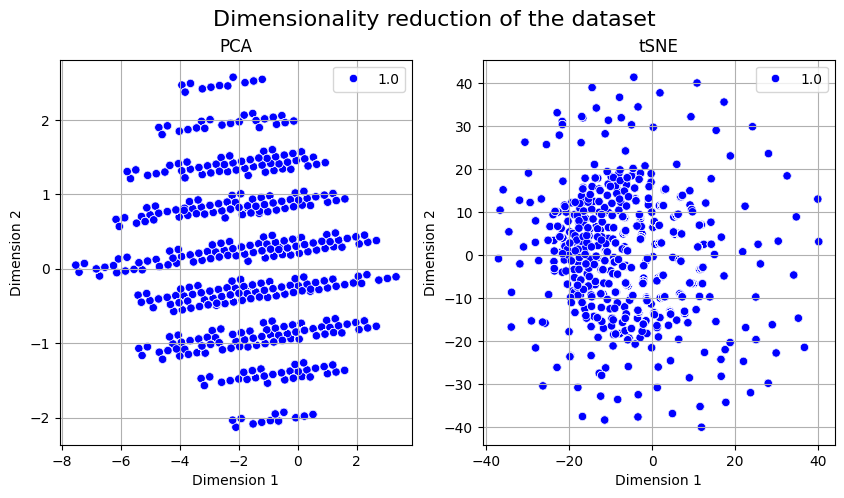

In [ ]:
# Now, you can run the following line
PCA_tSNE_visualization(augmented_df, 2, np.ones(augmented_df.shape[0]), PAL)

In [ ]:
augmented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30041 entries, 0 to 30040
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lessico_e_semantica     30041 non-null  float64
 1   sintassi                30041 non-null  float64
 2   comprensione_del_testo  30041 non-null  float64
 3   logica_verbale          30041 non-null  float64
dtypes: float64(4)
memory usage: 938.9 KB


In [ ]:
augmented_df.describe()

,lessico_e_semantica,sintassi,comprensione_del_testo,logica_verbale
count,3.004100e+04,3.004100e+04,3.004100e+04,3.004100e+04
mean,3.065355e-16,-1.655670e-17,5.085273e-17,1.015872e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-3.277493e+00,-3.053518e+00,-4.280012e+00,-4.843211e+00
25%,-9.123917e-01,-5.070218e-01,-5.571255e-01,-4.736338e-01
50%,-1.240246e-01,3.418102e-01,1.874517e-01,7.256325e-02
75%,6.643425e-01,1.190642e+00,9.320290e-01,6.187603e-01
max,1.452710e+00,1.190642e+00,1.676606e+00,2.257352e+00


## K-Means Clustering

The final SSE is: 45812.66 


<ipython-input-39-75aad3ad4306>:9: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x=augmented_df.iloc[:,0], y=augmented_df.iloc[:,-1], hue=kmeans.labels_, palette=PAL)


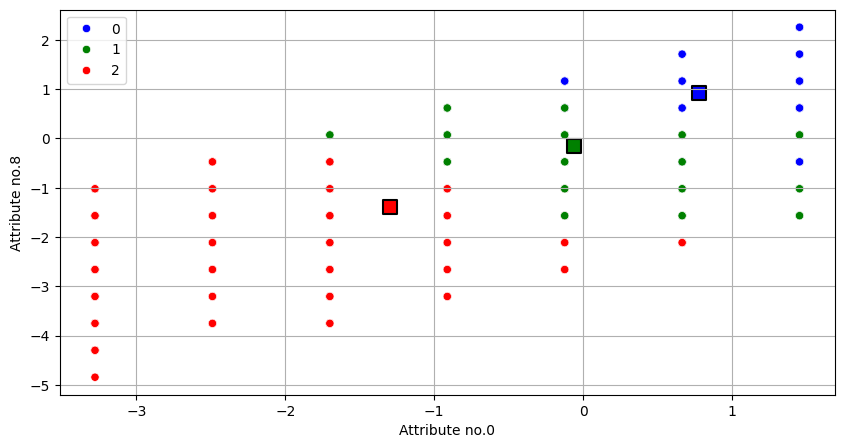

In [ ]:
from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=3, max_iter=300, tol=0.0001, verbose=0, random_state=30).fit(augmented_df)

# Print the final SSE value
print('The final SSE is: %.2f '% kmeans.inertia_)

fig4 = plt.figure('Single run - Random seeds initialization', figsize=(10,5))
sns.scatterplot(x=augmented_df.iloc[:,0], y=augmented_df.iloc[:,-1], hue=kmeans.labels_, palette=PAL)
for k in range(k):
  plt.scatter(x=kmeans.cluster_centers_[k,0], y=kmeans.cluster_centers_[k,-1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)
  sns.set_theme(style='dark')
plt.xlabel('Attribute no.%s' % 0)
plt.ylabel('Attribute no.%s' % 8)
plt.grid()
plt.show()

PCA: explained variation per principal component: [0.75 0.16]

Applying tSNE...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-4-6ff0588718c8>:38: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
<ipython-input-4-6ff0588718c8>:45: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


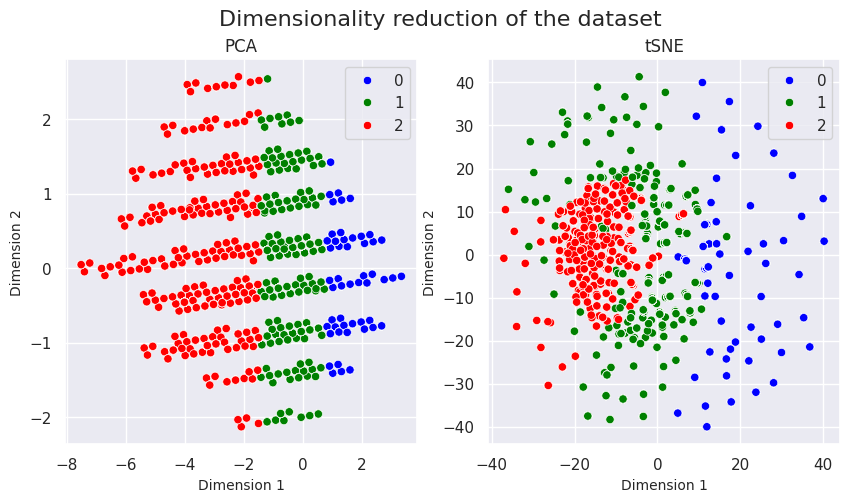

In [ ]:
# Visualize the clustering solution using PCA/tSNE with colours associated with clusters (clusters given by the current clustering solution)
LABELS = kmeans.labels_
PCA_tSNE_visualization(augmented_df, 2, LABELS, PAL)

In [ ]:
kmeans.predict(np.array(augmented_df.iloc[0], ).reshape(-1, 1).T)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [ ]:
scores.describe()

,lessico_e_semantica,sintassi,comprensione_del_testo,logica_verbale
count,30041.000000,30041.000000,30041.000000,30041.000000
mean,7.157318,5.597317,7.748244,12.867148
std,1.268466,1.178109,1.343066,1.830871
min,3.000000,2.000000,2.000000,4.000000
25%,6.000000,5.000000,7.000000,12.000000
50%,7.000000,6.000000,8.000000,13.000000
75%,8.000000,7.000000,9.000000,14.000000
max,9.000000,7.000000,10.000000,17.000000


In [ ]:
scores.iloc[LABELS==0].describe()

,lessico_e_semantica,sintassi,comprensione_del_testo,logica_verbale
count,11201.000000,11201.000000,11201.000000,11201.000000
mean,8.139809,6.442371,8.936970,14.543077
std,0.619408,0.682763,0.631714,0.882947
min,6.000000,5.000000,8.000000,12.000000
25%,8.000000,6.000000,9.000000,14.000000
50%,8.000000,7.000000,9.000000,15.000000
75%,9.000000,7.000000,9.000000,15.000000
max,9.000000,7.000000,10.000000,17.000000


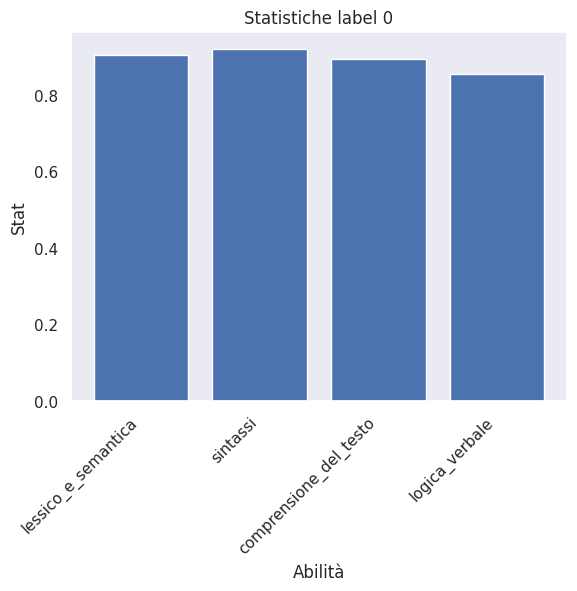

In [ ]:
x_pos = np.arange(len(augmented_df.columns))
plt.bar(x_pos, scores.iloc[LABELS==0].mean()/scores.max(), align='center')
plt.xticks(x_pos, augmented_df.columns, rotation=45, ha='right')
plt.ylabel('Stat')
plt.xlabel('Abilità')
plt.title('Statistiche label 0')
plt.show()

In [ ]:
scores.iloc[LABELS==1].describe()

,lessico_e_semantica,sintassi,comprensione_del_testo,logica_verbale
count,12782.000000,12782.000000,12782.000000,12782.000000
mean,7.076592,5.533406,7.619465,12.603036
std,0.884629,0.854634,0.672779,0.924579
min,4.000000,3.000000,6.000000,9.000000
25%,7.000000,5.000000,7.000000,12.000000
50%,7.000000,6.000000,8.000000,13.000000
75%,8.000000,6.000000,8.000000,13.000000
max,9.000000,7.000000,9.000000,15.000000


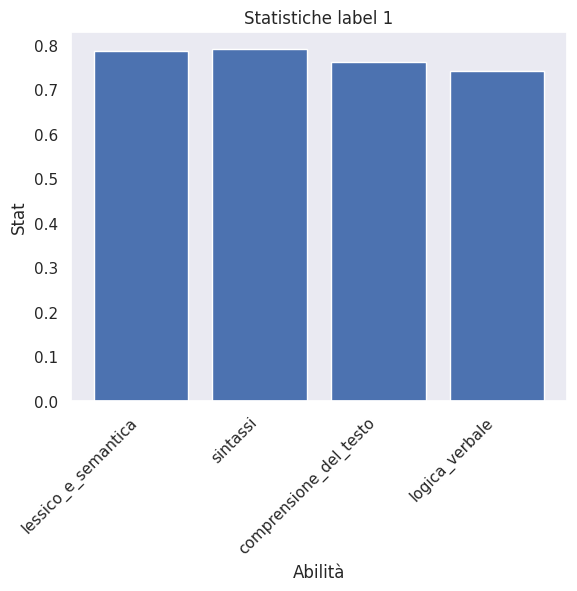

In [ ]:
x_pos = np.arange(len(augmented_df.columns))
plt.bar(x_pos, scores.iloc[LABELS==1].mean()/scores.max(), align='center')
plt.xticks(x_pos, augmented_df.columns, rotation=45, ha='right')
plt.ylabel('Stat')
plt.xlabel('Abilità')
plt.title('Statistiche label 1')
plt.show()

In [ ]:
scores.iloc[LABELS==2].describe()

,lessico_e_semantica,sintassi,comprensione_del_testo,logica_verbale
count,6058.000000,6058.000000,6058.000000,6058.000000
mean,5.511060,4.169693,5.822053,10.325685
std,1.053447,1.054841,0.945622,1.256216
min,3.000000,2.000000,2.000000,4.000000
25%,5.000000,3.000000,5.000000,10.000000
50%,6.000000,4.000000,6.000000,11.000000
75%,6.000000,5.000000,6.000000,11.000000
max,8.000000,7.000000,8.000000,13.000000


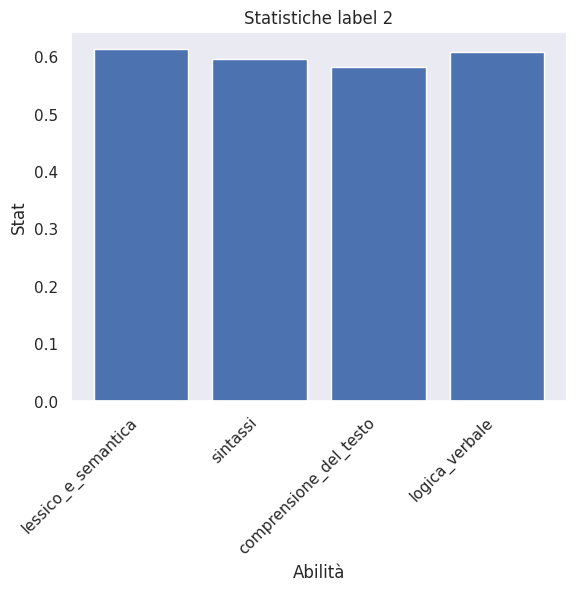

In [ ]:
x_pos = np.arange(len(augmented_df.columns))
plt.bar(x_pos, scores.iloc[LABELS==2].mean()/scores.max(), align='center')
plt.xticks(x_pos, augmented_df.columns, rotation=45, ha='right')
plt.ylabel('Stat')
plt.xlabel('Abilità')
plt.title('Statistiche label 2')
plt.show()